In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
mat=loadmat("ex3data1.mat")
X=mat["X"]
y=mat["y"]

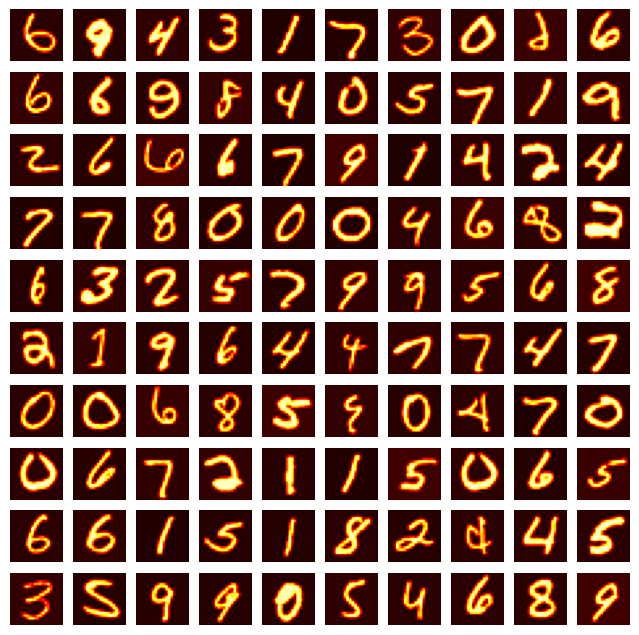

In [3]:
import matplotlib.image as mpimg
fig, axis=plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F"),cmap="hot")
        axis[i,j].axis("off")

Compute the Cost Funtion

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [5]:
def lrCostFunction(theta,X,y,Lambda):
    m=len(y)
    predictions=sigmoid(X@theta)
    error=(-y*np.log(predictions))-((1-y)*np.log(1-predictions))
    cost=1/m*sum(error)
    regCost=cost+Lambda/(2*m)*sum(theta[1:]**2)
    # Compute the gradient
    j_0=1/m*(X.transpose()@(predictions-y))[0]
    j_1=1/m*(X.transpose()@(predictions-y))[1:] + (Lambda/m)*theta[1:]
    grad=np.vstack((j_0[:,np.newaxis],j_1))
    return regCost[0], grad

In [6]:
theta_t=np.array([-2,-1,1,2]).reshape(4,1)
X_t=np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T
X_t=np.hstack((np.ones((5,1)),X_t))
y_t=np.array([1,0,1,0,1]).reshape(5,1)
J,grad=lrCostFunction(theta_t,X_t,y_t,3)
print("Cost:",J,"Expected cost: 2.534819")
print("Gradients:\n",grad,"\nExpected gradients:\n 0.146561\n -0.548558\n 0.7724722\n 1.398003")

Cost: 2.534819396109744 Expected cost: 2.534819
Gradients:
 [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]] 
Expected gradients:
 0.146561
 -0.548558
 0.7724722
 1.398003


One-vs-all Classification

In [7]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    m=len(y)
    J_history=[]
    for i in range(num_iters):
        cost,grad=lrCostFunction(theta,X,y,Lambda)
        theta=theta-(alpha*grad)
        J_history.append(cost)
    return theta, J_history

In [10]:
def oneVsAll(X,y,num_labels,Lambda):
    m,n=X.shape[0],X.shape[1]
    initial_theta=np.zeros((n+1,1))
    all_theta=[]
    all_J=[]
    X=np.hstack((np.ones((m,1)),X))
    for i in range(1,num_labels+1):
        theta,J_history=gradientDescent(X,np.where(y==i,1,0),initial_theta,1,300,Lambda)
        all_theta.extend(theta)
        all_J.extend(J_history)
    return np.array(all_theta).reshape(num_labels,n+1), all_J

In [11]:
all_theta,all_J=oneVsAll(X,y,10,0.1)

Plotting of Cost Function

Text(0.5, 1.0, 'Cost function using Gradient Descent')

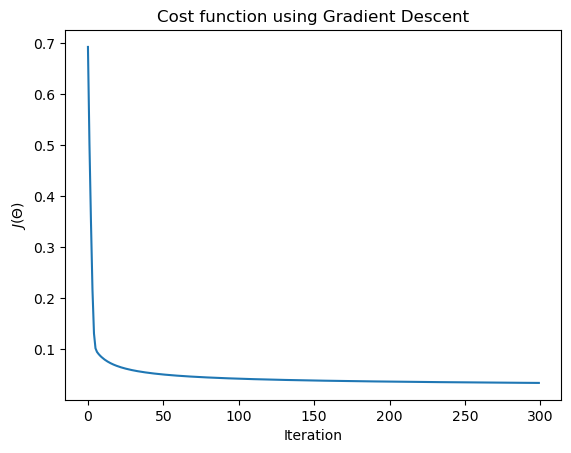

In [12]:
plt.plot(all_J[0:300])
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

One-vs-all Prediction

In [13]:
def predictOneVsAll(all_theta,X):
    m=X.shape[0]
    X=np.hstack((np.ones((m,1)),X))
    predictions=X@all_theta.T
    return np.argmax(predictions,axis=1)+1

In [14]:
pred=predictOneVsAll(all_theta,X)

In [15]:
print("Training Set Accuracy:",sum(pred[:,np.newaxis]==y)[0]/5000*100,"%")

Training Set Accuracy: 91.46 %


Neural Networks


In [17]:
mat2=loadmat("ex3weights.mat")
Theta1=mat2["Theta1"]
Theta2=mat2["Theta2"]


Feed Forward Propagation

In [19]:
def predict(Theta1,Theta2,X):
    m=X.shape[0]
    X=np.hstack((np.ones((m,1)),X))
    a1=sigmoid(X@Theta1.T)
    a1=np.hstack((np.ones((m,1)),a1))
    a2=sigmoid(a1@Theta2.T)
    return np.argmax(a2,axis=1)+1

In [20]:
pred2=predict(Theta1,Theta2,X)
print("Training Set Accuracy:",sum(pred2[:,np.newaxis]==y)[0]/5000*100,"%")

Training Set Accuracy: 97.52 %


Compute the Neural Networks cost function

In [38]:
def nnCostFunction(nn_params,input_layer_size, hidden_layer_size, num_labels,X, y,Lambda):
    """
    nn_params contains the parameters unrolled into a vector
    
    compute the cost and gradient of the neural network
    """
    # Reshape nn_params back into the parameters Theta1 and Theta2
    Theta1 = nn_params[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
    Theta2 = nn_params[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)
    
    m = X.shape[0]
    J=0
    X = np.hstack((np.ones((m,1)),X))
    y10 = np.zeros((m,num_labels))
    
    a1 = sigmoid(X @ Theta1.T)
    a1 = np.hstack((np.ones((m,1)), a1)) # hidden layer
    a2 = sigmoid(a1 @ Theta2.T) # output layer
    
    for i in range(1,num_labels+1):
        y10[:,i-1][:,np.newaxis] = np.where(y==i,1,0)
    for j in range(num_labels):
        J = J + sum(-y10[:,j] * np.log(a2[:,j]) - (1-y10[:,j])*np.log(1-a2[:,j]))
    
    cost = 1/m* J
    reg_J = cost + Lambda/(2*m) * (np.sum(Theta1[:,1:]**2) + np.sum(Theta2[:,1:]**2))
    
    # Implement the backpropagation algorithm to compute the gradients
    
    grad1 = np.zeros((Theta1.shape))
    grad2 = np.zeros((Theta2.shape))
    
    for i in range(m):
        xi= X[i,:] # 1 X 401
        a1i = a1[i,:] # 1 X 26
        a2i =a2[i,:] # 1 X 10
        d2 = a2i - y10[i,:]
        d1 = Theta2.T @ d2.T * sigmoidGradient(np.hstack((1,xi @ Theta1.T)))
        grad1= grad1 + d1[1:][:,np.newaxis] @ xi[:,np.newaxis].T
        grad2 = grad2 + d2.T[:,np.newaxis] @ a1i[:,np.newaxis].T
        
    grad1 = 1/m * grad1
    grad2 = 1/m*grad2
    
    grad1_reg = grad1 + (Lambda/m) * np.hstack((np.zeros((Theta1.shape[0],1)),Theta1[:,1:]))
    grad2_reg = grad2 + (Lambda/m) * np.hstack((np.zeros((Theta2.shape[0],1)),Theta2[:,1:]))
    
    return cost, grad1, grad2,reg_J, grad1_reg,grad2_reg

In [39]:
def sigmoidGradient(z):
    sigmoid=1/(1+np.exp(-z))
    return sigmoid*(1-sigmoid)

In [40]:
input_layer_size  = 400
hidden_layer_size = 25
num_labels = 10
nn_params = np.append(Theta1.flatten(),Theta2.flatten())
J,reg_J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, 1)[0:4:3]
print("Cost at parameters (non-regularized):",J,"\nCost at parameters (Regularized):",reg_J)

Cost at parameters (non-regularized): 0.2876291651613188 
Cost at parameters (Regularized): 0.38376985909092354


Random Initialization

In [41]:
def randInitializeWeights(L_in,L_out):
    epi=(6**1/2)/(L_in+L_out)**1/2
    W=np.random.rand(L_out,L_in+1)*(2*epi)-epi
    return W

In [44]:
initial_Theta1=randInitializeWeights(input_layer_size,hidden_layer_size)
initial_Theta2=randInitializeWeights(hidden_layer_size,num_labels)
initial_nn_params=np.append(initial_Theta1.flatten(),initial_Theta2.flatten())

In [45]:
debug_J=nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,y,3)
print("Cost at (fixed) debugging parameters (w/lambda=3):",debug_J[3])

Cost at (fixed) debugging parameters (w/lambda=3): 0.576051246950133


Learning Parameters using Gradient Descent


In [46]:
def gradientDescent(X,y,initial_nn_params,alpha,num_iters,Lambda,input_layer_size,hidden_layer_size,num_labels):
    Theta1=initial_nn_params[:((input_layer_size+1)*hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
    Theta2=initial_nn_params[:((input_layer_size+1)*hidden_layer_size)].reshape(num_labels,hidden_layer_size+1)
    m=len(y)
    J_history=[]
    for i in range (num_iters):
        nn_params=np.append(Theta1.flatten(),Theta2.flatten())
        cost,grad1,grad2=nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X, y,Lambda)[3:]
        Theta1=Theta1-(alpha*grad1)
        Theta2=Theta2-(alpha*grad2)
        J_history.append(cost)
    nn_paramsFinal=nn.append(Theta1.flatten(),Theta2.flatten())
    return nn_paramsFinal, J_history
        

In [47]:
nnTheta, nnJ_history = gradientDescentnn(X,y,initial_nn_params,0.8,800,1,input_layer_size, hidden_layer_size, num_labels)
Theta1 = nnTheta[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
Theta2 = nnTheta[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)

NameError: name 'gradientDescentnn' is not defined